<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/0321_1804_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [54]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

In [84]:
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import re

!pip install contextily
import contextily as ctx

!pip install geoplot
import geoplot as gplt
import lightgbm as lgb

!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

!pip install pdpbox
from pdpbox import pdp, info_plots   # get_dataset

!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=caca6cde0513690593aeb8921035821380858924df59cb017499ae79fbf3d233
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.8 MB/s eta 0:00:00


In [57]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK

Downloading...
From: https://drive.google.com/uc?id=1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK
To: /content/crime_data_2023demo.csv
100% 45.8M/45.8M [00:00<00:00, 221MB/s]


In [117]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])
)
df_raw_crime

# df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',  'dc_key', 'dc_dist', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...           2   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...           4   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...           7   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...         123   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...         126   
...                                                   ...         ...   
169012  0101000020E6100000F5F983DCE0C952C063382A79EDF5...     3231845   
169013  0101000020E6100000544D94AD83CB52C019460FB6B7FD...     3231846   
169014  0101000020E6100000549B6AF3A0CE52C093C74FBADFFD...     3231847   
169015  0101000020E610000065E33DDED6CD52C0B8BFA35BE902...     3231848   
169016  0101000020E6100000570BAA153FC752C03806AE3C1206...     3231849   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
169012  0101000020110F0000CFDC58FA0FEA5FC1EEFC5B72BC84...  11907416        3   
169013  0101000020110F000047AC5161D7EC5FC142AA0ADD5D8D...  11936133       22   
169014  0101000020110F00004EEFD3A021F25FC19C03CE378A8D...  11938562       19   
169015  0101000020110F0000A128D35ECAF05FC15A82B9122093...  11941456        5   
169016  0101000020110F0000DEB5128097E55FC124802153A196...  11963779       35   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
169012   2  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013   4  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014   3  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015   1  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016   1  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

              dc_key             location_block  ucr_general  \
0       2.023250e+11    3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11       2400 BLOCK S 28TH ST          600   
2       2.023080e+11  9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11      4700 BLOCK GRISCOM ST          600   
4       2.023140e+11        5500 BLOCK BLOYD ST          300   
...              ...                        ...          ...   
169012  2.023031e+11       400 BLOCK JACKSON ST         2600   
169013  2.023221e+11       1700 BLOCK N 28TH ST          800   
169014  2.023191e+11      1700 BLOCK N PEACH ST         1100   
169015  2.023050e+11      100 BLOCK KINGSLEY ST         1100   
169016  2.023351e+11      200 BLOCK FARISTON DR         1100   

                  Category          X          Y        lat        lng  
0       Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1       Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                   Thefts -75.015070  40.094525  40.094525 -75.015070  
3                   Thefts -75.083953  40.017896  40.017896 -75.083953  
4       Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                    ...        ...        ...        ...        ...  
169012  All Other Offenses -75.154349  39.921310  39.921310 -75.15

In [96]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...           2   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...           4   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...           7   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...         123   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...         126   
...                                                   ...         ...   
169012  0101000020E6100000F5F983DCE0C952C063382A79EDF5...     3231845   
169013  0101000020E6100000544D94AD83CB52C019460FB6B7FD...     3231846   
169014  0101000020E6100000549B6AF3A0CE52C093C74FBADFFD...     3231847   
169015  0101000020E610000065E33DDED6CD52C0B8BFA35BE902...     3231848   
169016  0101000020E6100000570BAA153FC752C03806AE3C1206...     3231849   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
169012  0101000020110F0000CFDC58FA0FEA5FC1EEFC5B72BC84...  11907416        3   
169013  0101000020110F000047AC5161D7EC5FC142AA0ADD5D8D...  11936133       22   
169014  0101000020110F00004EEFD3A021F25FC19C03CE378A8D...  11938562       19   
169015  0101000020110F0000A128D35ECAF05FC15A82B9122093...  11941456        5   
169016  0101000020110F0000DEB5128097E55FC124802153A196...  11963779       35   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
169012   2  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013   4  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014   3  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015   1  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016   1  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

              dc_key             location_block  ucr_general  \
0       2.023250e+11    3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11       2400 BLOCK S 28TH ST          600   
2       2.023080e+11  9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11      4700 BLOCK GRISCOM ST          600   
4       2.023140e+11        5500 BLOCK BLOYD ST          300   
...              ...                        ...          ...   
169012  2.023031e+11       400 BLOCK JACKSON ST         2600   
169013  2.023221e+11       1700 BLOCK N 28TH ST          800   
169014  2.023191e+11      1700 BLOCK N PEACH ST         1100   
169015  2.023050e+11      100 BLOCK KINGSLEY ST         1100   
169016  2.023351e+11      200 BLOCK FARISTON DR         1100   

                  Category          X          Y        lat        lng  
0       Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1       Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                   Thefts -75.015070  40.094525  40.094525 -75.015070  
3                   Thefts -75.083953  40.017896  40.017896 -75.083953  
4       Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                    ...        ...        ...        ...        ...  
169012  All Other Offenses -75.154349  39.921310  39.921310 -75.15

In [188]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))
train

Training set size: 135213
Testing set size: 33804


the_geom  cartodb_id  \
109361  0101000020E6100000F43BA81FEFCB52C0213E6EC76DFF...     3110122   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000003406847399C952C051F28F6390F8...     3147129   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000035EBADFD34CA52C0BC85018D4A01...     3120640   
103694  0101000020E6100000B5982BC546CC52C0FF175B4A8EFB...     3104455   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...     3132693   
146867  0101000020E6100000405E7AC148C452C00F8653499101...     3148015   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...     3122719   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00005C0129E38DED5FC120C66576438F...   7570944       22   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00006BB63AAE96E95FC1266D44F7A787...  12136219        3   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000541C63E19EEA5FC132CCAC125491...   7678366       39   
103694  0101000020110F00001CBA88C322EE5FC1864B0688F88A...   7430571       16   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
146867  0101000020110F00009DFF04678FE05FC150C65782A291...  11424601       15   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
109361   2  2023-08-20 20:28:00+00    2023-08-20      16:28:00   NaN   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0   
146152   1  2023-11-18 20:36:00+00    2023-11-18      15:36:00  15.0   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN   
...     ..                     ...           ...           ...   ...   
119879   2  2023-08-28 13:11:00+00    2023-08-28      09:11:00   NaN   
103694   1  2023-08-18 12:42:00+00    2023-08-18      08:42:00   NaN   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN   
146867   2  2023-11-20 13:55:00+00    2023-11-20      08:55:00   8.0   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN   

              dc_key           location_block  ucr_general  \
109361  2.023220e+11    3300 BLOCK W FIRTH ST          800   
365     2.023030e+11      400 BLOCK OREGON AV          600   
146152  2.023030e+11       400 BLOCK South St          600   
94974   2.023350e+11  1800 BLOCK W RUSCOMB ST          500   
77016   2.023390e+11  2700 BLOCK N BONSALL ST         2600   
...              ...                      ...          ...   
119879  2.023390e+11     1900 BLOCK W ERIE AV         1400   
103694  2.023160e+11      600 BLOCK N 34TH ST          700   
131932  2.023260e+11       1100 BLOCK EARL ST          700   
146867  2.023151e+11      5500 BLOCK TULIP ST          600   
121958  2.023020e+11    2100 BLOCK COTTMAN AV          600   

                           Category          X          Y        lat  \
109361               Other Assaults -75.186470  39.995538  39.995538   
365                          Thefts -75.155990  39.914787  39.914787   
146152                       Thefts -75.149991  39.941906  39.941906   
94974          Burglary Residential -75.153732  40.029858  40.029858   
77016            All Other Offenses -75.169748  39.995936  39.995936   
...                             ...        ...        ...        ...   
119879  Vandalism/Criminal Mischief -75.159484  40.010088  40.010088   
103694          Motor Veh

In [98]:
train.duplicated().sum()

0

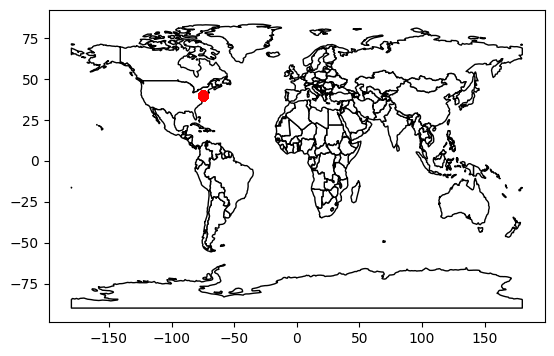

In [99]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


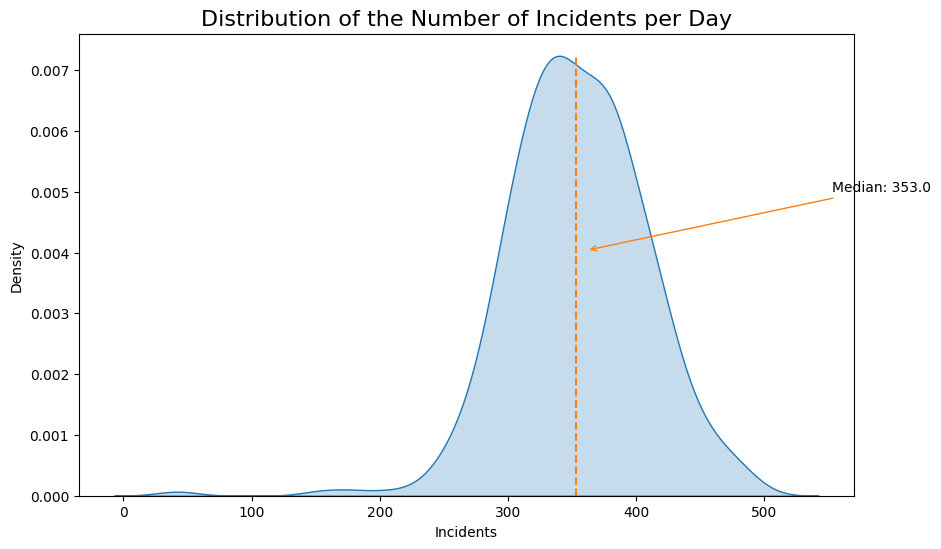

In [100]:
col = sns.color_palette()

# Calculate the date and hour
train['Date'] = train.dispatch_date.dt.date
train['Hour'] = train.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [101]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train['weekday'] = train['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train['weekday'] = train['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train


the_geom  cartodb_id  \
109361  0101000020E6100000F43BA81FEFCB52C0213E6EC76DFF...     3110122   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000003406847399C952C051F28F6390F8...     3147129   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000035EBADFD34CA52C0BC85018D4A01...     3120640   
103694  0101000020E6100000B5982BC546CC52C0FF175B4A8EFB...     3104455   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...     3132693   
146867  0101000020E6100000405E7AC148C452C00F8653499101...     3148015   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...     3122719   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00005C0129E38DED5FC120C66576438F...   7570944       22   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00006BB63AAE96E95FC1266D44F7A787...  12136219        3   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000541C63E19EEA5FC132CCAC125491...   7678366       39   
103694  0101000020110F00001CBA88C322EE5FC1864B0688F88A...   7430571       16   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
146867  0101000020110F00009DFF04678FE05FC150C65782A291...  11424601       15   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
109361   2  2023-08-20 20:28:00+00    2023-08-20      16:28:00   NaN  ...   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0  ...   
146152   1  2023-11-18 20:36:00+00    2023-11-18      15:36:00  15.0  ...   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN  ...   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN  ...   
...     ..                     ...           ...           ...   ...  ...   
119879   2  2023-08-28 13:11:00+00    2023-08-28      09:11:00   NaN  ...   
103694   1  2023-08-18 12:42:00+00    2023-08-18      08:42:00   NaN  ...   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN  ...   
146867   2  2023-11-20 13:55:00+00    2023-11-20      08:55:00   8.0  ...   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN  ...   

                 location_block ucr_general                     Category  \
109361    3300 BLOCK W FIRTH ST         800               Other Assaults   
365         400 BLOCK OREGON AV         600                       Thefts   
146152       400 BLOCK South St         600                       Thefts   
94974   1800 BLOCK W RUSCOMB ST         500         Burglary Residential   
77016   2700 BLOCK N BONSALL ST        2600           All Other Offenses   
...                         ...         ...                          ...   
119879     1900 BLOCK W ERIE AV        1400  Vandalism/Criminal Mischief   
103694      600 BLOCK N 34TH ST         700          Motor Vehicle Theft   
131932       1100 BLOCK EARL ST         700          Motor Vehicle Theft   
146867      5500 BLOCK TULIP ST         600                       Thefts   
121958    2100 BLOCK COTTMAN AV         600                       Thefts   

                X          Y        lat        lng        Date Hour    weekday  
109361 -75.186470  39.995538  39.995538 -75.186470  2023-08-20    0     Sunday  
365    -75.155990  39.914787  39.914787 -75.155990  2023-02-19    0     Sunday  
146152 -75.149991  39.941906  39.941906 -75.149991  2023-11-18    0   Saturday  
94974  -75.153732  40.029858  40.029858 -75.15373

In [102]:
data = train.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       19869
Tuesday      19893
Wednesday    20122
Thursday     18583
Friday       18524
Saturday     16445
Sunday       16169
Name: the_geom, dtype: int64

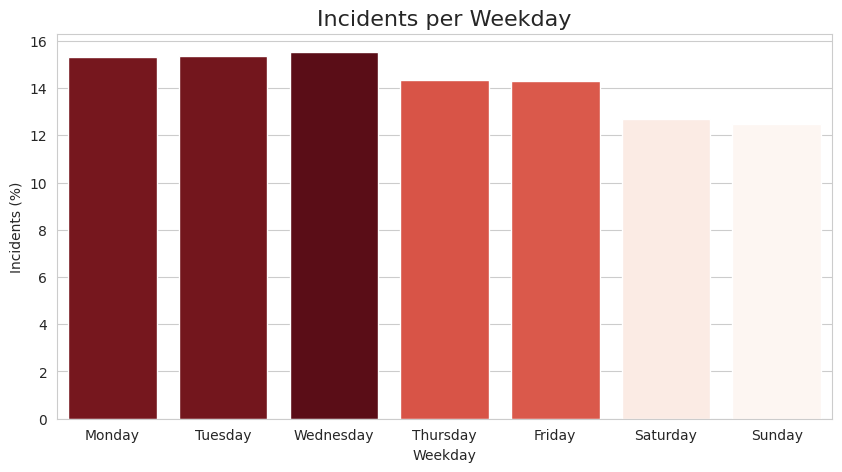

In [103]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x = data.index,  # X-axis data (weekdays)
        y = (data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [120]:
train

the_geom  cartodb_id  \
109361  0101000020E6100000F43BA81FEFCB52C0213E6EC76DFF...     3110122   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000003406847399C952C051F28F6390F8...     3147129   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000035EBADFD34CA52C0BC85018D4A01...     3120640   
103694  0101000020E6100000B5982BC546CC52C0FF175B4A8EFB...     3104455   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...     3132693   
146867  0101000020E6100000405E7AC148C452C00F8653499101...     3148015   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...     3122719   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00005C0129E38DED5FC120C66576438F...   7570944       22   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00006BB63AAE96E95FC1266D44F7A787...  12136219        3   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000541C63E19EEA5FC132CCAC125491...   7678366       39   
103694  0101000020110F00001CBA88C322EE5FC1864B0688F88A...   7430571       16   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
146867  0101000020110F00009DFF04678FE05FC150C65782A291...  11424601       15   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
109361   2  2023-08-20 20:28:00+00    2023-08-20      16:28:00   NaN   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0   
146152   1  2023-11-18 20:36:00+00    2023-11-18      15:36:00  15.0   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN   
...     ..                     ...           ...           ...   ...   
119879   2  2023-08-28 13:11:00+00    2023-08-28      09:11:00   NaN   
103694   1  2023-08-18 12:42:00+00    2023-08-18      08:42:00   NaN   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN   
146867   2  2023-11-20 13:55:00+00    2023-11-20      08:55:00   8.0   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN   

              dc_key           location_block  ucr_general  \
109361  2.023220e+11    3300 BLOCK W FIRTH ST          800   
365     2.023030e+11      400 BLOCK OREGON AV          600   
146152  2.023030e+11       400 BLOCK South St          600   
94974   2.023350e+11  1800 BLOCK W RUSCOMB ST          500   
77016   2.023390e+11  2700 BLOCK N BONSALL ST         2600   
...              ...                      ...          ...   
119879  2.023390e+11     1900 BLOCK W ERIE AV         1400   
103694  2.023160e+11      600 BLOCK N 34TH ST          700   
131932  2.023260e+11       1100 BLOCK EARL ST          700   
146867  2.023151e+11      5500 BLOCK TULIP ST          600   
121958  2.023020e+11    2100 BLOCK COTTMAN AV          600   

                           Category          X          Y        lat  \
109361               Other Assaults -75.186470  39.995538  39.995538   
365                          Thefts -75.155990  39.914787  39.914787   
146152                       Thefts -75.149991  39.941906  39.941906   
94974          Burglary Residential -75.153732  40.029858  40.029858   
77016            All Other Offenses -75.169748  39.995936  39.995936   
...                             ...        ...        ...        ...   
119879  Vandalism/Criminal Mischief -75.159484  40.010088  40.010088   
103694          Motor Veh

In [105]:
data = train.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

Category
Thefts                                     28346
Other Assaults                             20183
Motor Vehicle Theft                        17199
Vandalism/Criminal Mischief                13395
All Other Offenses                         10363
Theft from Vehicle                          9590
Fraud                                       5908
Aggravated Assault No Firearm               3942
Burglary Residential                        2942
Aggravated Assault Firearm                  2566
Weapon Violations                           2516
Robbery No Firearm                          2076
Narcotic / Drug Law Violations              2059
Robbery Firearm                             1964
Burglary Non-Residential                    1405
Receiving Stolen Property                   1138
Other Sex Offenses (Not Commercialized)      785
DRIVING UNDER THE INFLUENCE                  678
Arson                                        545
Rape                                         426
Offenses Against Family and Children         311
Disorderly Conduct                           310
Homicide - Criminal                          262
Prostitution and Commercialized Vice         237
Forgery and Counterfeiting                   191
Embezzlement                                 175
Liquor Law Violations                         56
Public Drunkenness                            22
Vagrancy/Loitering                             8
Homicide - Justifiable                         4
Gambling Violations                            3
Homicide - Gross Negligence                    0
Name: the_geom, dtype: int64

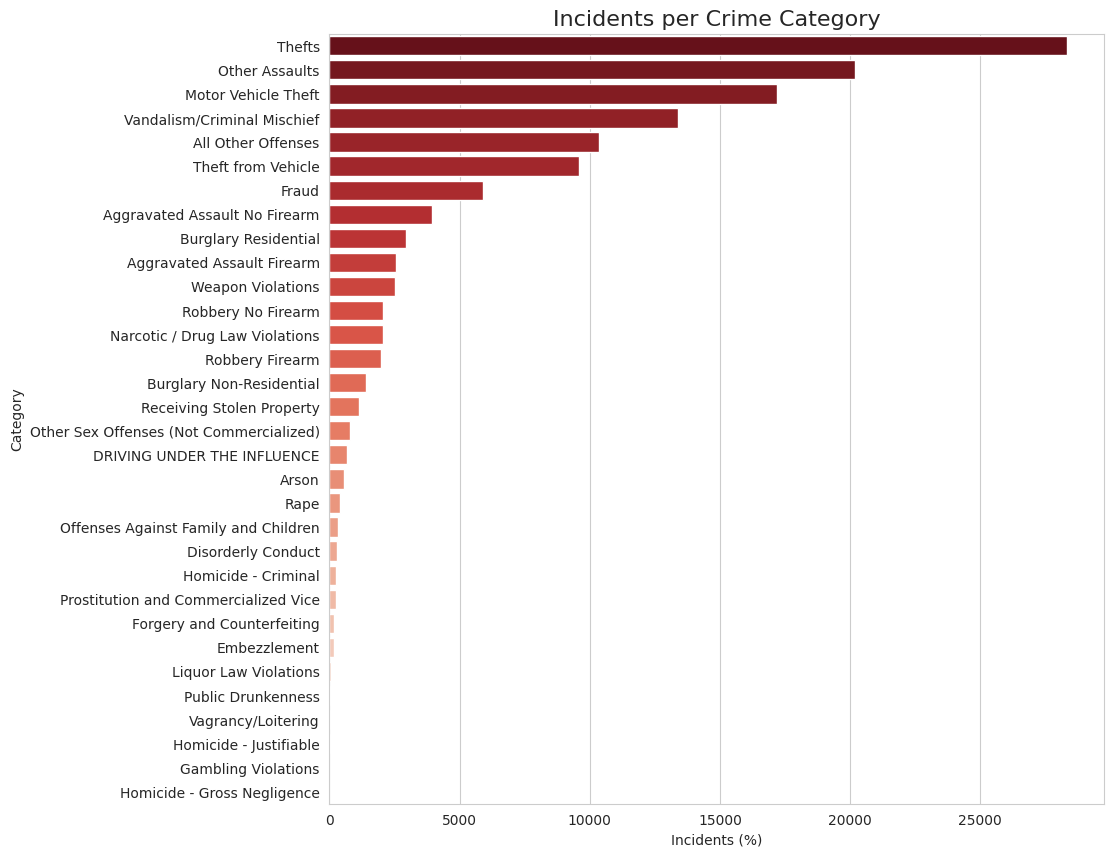

In [106]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()


## **Feature Engineering**

In [189]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (
        data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    # data['Block'] = data['Address'].str.contains('block', case=False)

    data.drop(columns=['Dates','Date','the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'psa', 'dispatch_date_time', 'dispatch_date','dispatch_time','dc_key', 'location_block', 'ucr_general' ,'lat','lng','Dates', 'Date', 'hour'], inplace=True)

    return data

In [190]:
train['Dates'] = pd.to_datetime(train['dispatch_date_time'])
train = feature_engineering(train)

train.head()

dc_dist              Category          X          Y  n_days  Day  \
109361       22        Other Assaults -75.186470  39.995538     231   20   
365           3                Thefts -75.155990  39.914787      49   19   
146152        3                Thefts -75.149991  39.941906     321   18   
94974        35  Burglary Residential -75.153732  40.029858     203   23   
77016        39    All Other Offenses -75.169748  39.995936     150   31   

        DayOfWeek  Month  Year  Hour  Minute  
109361          6      8  2023    20      28  
365             6      2  2023    15      52  
146152          5     11  2023    20      36  
94974           6      7  2023    20      42  
77016           2      5  2023    18      34

In [192]:
test['Dates'] = pd.to_datetime(test['dispatch_date_time'])
test = feature_engineering(test)

test.head()

dc_dist              Category          X          Y  n_days  Day  \
80753        18                Thefts -75.196152  39.945977     168   18   
160842        3        Other Assaults -75.145841  39.934302     352   19   
67557        22        Other Assaults -75.168282  39.990278     151    1   
110516       26  Burglary Residential -75.139517  39.974262     236   25   
70132        16   Motor Vehicle Theft -75.201841  39.974112     159    9   

        DayOfWeek  Month  Year  Hour  Minute  
80753           6      6  2023     0      51  
160842          1     12  2023    15      24  
67557           3      6  2023    14      41  
110516          4      8  2023    18      39  
70132           4      6  2023     4      10

## **Feature Scaling**
## **Feature Selection**

In [148]:
le1 = LabelEncoder()
train['dc_dist'] = le1.fit_transform(train['dc_dist'])
# test['PdDistrict'] = le1.transform(test['PdDistrict'])


le2 = LabelEncoder()
y = le2.fit_transform(train.pop('Category'))

train_X, val_X, train_y, val_y = train_test_split(train, y)

model =LGBMClassifier(objective='multiclass', num_class=39).fit(train_X, train_y)

perm = PermutationImportance(model).fit(val_X, val_y)
eli5.show_weights(perm, feature_names=val_X.columns.tolist())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 101409, number of used features: 9
[LightGBM] [Info] Start training from score -3.929019
[LightGBM] [Info] Start training from score -3.488082
[LightGBM] [Info] Start training from score -2.540596
[LightGBM] [Info] Start training from score -5.458492
[LightGBM] [Info] Start training from score -4.518412
[LightGBM] [Info] Start training from score -3.793234
[LightGBM] [Info] Start training from score -5.276942
[LightGBM] [Info] Start training from score -6.054646
[LightGBM] [Info] Start training from score -6.578157
[LightGBM] [Info] Start training from score -6.496479
[LightGBM] [Info] Start training from score -3.096590
[LightGBM] [Info] Start training from score -10.428305

Weight,Feature
0.0404 ± 0.0022,Y
0.0395 ± 0.0014,X
0.0296 ± 0.0008,Hour
0.0197 ± 0.0020,dc_dist
0.0150 ± 0.0030,n_days
0.0092 ± 0.0004,Month
0.0040 ± 0.0010,Day
0.0029 ± 0.0021,DayOfWeek
0.0028 ± 0.0023,Minute
0 ± 0.0000,Year


## **Building the Initial Model**

具体流程详见
https://www.kaggle.com/code/yannisp/sf-crime-analysis-prediction-base-model/notebook

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb

In [193]:
train_1 = train.copy()
test_1 = test.copy()

In [197]:
le1 = LabelEncoder()
train['dc_dist'] = le1.fit_transform(train['dc_dist'])
test['dc_dist'] = le1.transform(test['dc_dist'])

le2 = LabelEncoder()
y = le2.fit_transform(train.pop('Category'))

In [205]:
train_set = lgb.Dataset(
    train, label=y, categorical_feature=['dc_dist'], free_raw_data=False)

In [215]:
params = {
    'objective': 'multiclass',
    'num_class': 32 ,
    'early_stopping_rounds' : 10
}

In [216]:
cv_results = lgb.cv(params, train_set, metrics='multi_logloss')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 107230, number of used features: 9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 107230, number of used features: 9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 107230, number of used features: 9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003043 seconds.
You can set `force_row_wise=true

In [220]:
print('Best score: ', min(cv_results['valid multi_logloss-mean']))

Best score:  2.490322889388374


In [222]:
num_boost_round = np.argmin(cv_results['valid multi_logloss-mean'])
print('Best epoch: ', num_boost_round)

Best epoch:  1


In [225]:
bst = lgb.train(params, train_set, num_boost_round=num_boost_round)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 134038, number of used features: 9
[LightGBM] [Info] Start training from score -3.920926
[LightGBM] [Info] Start training from score -3.491781
[LightGBM] [Info] Start training from score -2.595238
[LightGBM] [Info] Start training from score -5.467285
[LightGBM] [Info] Start training from score -4.500019
[LightGBM] [Info] Start training from score -3.787912
[LightGBM] [Info] Start training from score -5.385884
[LightGBM] [Info] Start training from score -6.037558
[LightGBM] [Info] Start training from score -6.574770
[LightGBM] [Info] Start training from score -6.517612
[LightGBM] [Info] Start training from score -3.090819
[LightGBM] [Info] Start training from score -10.707266

ValueError: For early stopping, at least one dataset and eval metric is required for evaluation

In [224]:
predictions = bst.predict(test)

NameError: name 'bst' is not defined

In [ ]:
submission = pd.DataFrame(predictions,
                          columns=le2.classes_,
                          index=test.index)
submission.to_csv('LGBM - base model.csv', index_label='Id')

## **Building the final model**

## **Model Evaluation and Validation**

## **Conclusion**